In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Work based on https://jonathansoma.com/lede/foundations/classes/text%20processing/tf-idf/

# Exclusion

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
exclusion = pd.read_csv('/content/gdrive/MyDrive/Harvard/Capstone/Prostate/spreadsheets/exclusion.csv')  

In [ ]:
exclusion.columns

Index(['Unnamed: 0', 'study_id', 'study_title', 'exclusion_criteria'], dtype='object')

In [ ]:
exclusion = exclusion.fillna('')

In [ ]:
texts = np.array(exclusion['exclusion_criteria'])

In [ ]:
# https://stackoverflow.com/questions/24386489/adding-words-to-scikit-learns-countvectorizers-stop-list/24386751
from sklearn.feature_extraction import text 
# new stopwords are based on https://cs.stanford.edu/people/sonal/gupta14jamia_supl.pdf
new_stopwords = ["Eligibility Criteria", 'disease', 'diseases', 'disorder', 'symptom', 'symptoms', 'drug', 'drugs', 'problems', 'problem','prob', 'probs', 'med', 'meds',
'pill', 'pills', 'medicine', 'medicines', 'medication', 'medications', 'treatment', 'treatments', 'caps', 'capsules', 'capsule',
'tablet', 'tablets', 'tabs', 'doctor', 'dr', 'dr.', 'doc', 'physician', 'physicians', 'test', 'tests', 'testing', 'specialist', 'specialists',
'side-effect', 'side-effects', 'pharmaceutical', 'pharmaceuticals', 'pharma', 'diagnosis', 'diagnose', 'diagnosed', 'exam',
'challenge', 'device', 'condition', 'conditions', 'suffer', 'suffering' ,'suffered', 'feel', 'feeling', 'prescription', 'prescribe',
'prescribed', 'over-the-counter', 'otc' ]
my_stopwords = ['patient', 'exclusion', 'inclusion', 'criteria', 'disease', 'patients', 'prostate', 'prostatic', 'clinical', 'cancer', 'age', 'years', 'male', 'female', 'maximum', 'minimum', 'healthy', 'volunteers', 'study', 'gender']
stop_words = text.ENGLISH_STOP_WORDS.union(new_stopwords)
stop_words = text.ENGLISH_STOP_WORDS.union(my_stopwords)

In [ ]:
#https://stackoverflow.com/questions/47010044/how-to-remove-numeric-characters-present-in-countvectorizer
import re
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    return text

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english')

In [ ]:
X = count_vectorizer.fit_transform(texts)

In [ ]:
pd.DataFrame(X.toarray(), columns=count_vectorizer.get_feature_names())

,000,001,10,100,100ng,100x,105,109,10mg,10mm,11,110,1119,12,120,124i,126,13,14,140,15,150,150mmhg,153,15mm,16,160,17,170,171,174,17α,18,180,184,186,188,19,190,195,...,water,wave,wbc,week,weekend,weeks,weighing,weight,weighted,welfare,whichever,white,wide,william,willing,window,withdraw,withdrawal,withdrawn,wks,women,worse,worsened,wort,wound,write,written,xa,xarelto,xx,year,years,york,za,ziprasidone,zoladex,zone,zytiga,µl,µmol
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
233,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
235,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
count_vectorizer = CountVectorizer(stop_words=stop_words, preprocessor=preprocess_text)
X = count_vectorizer.fit_transform(texts)
pd.DataFrame(X.toarray(), columns=count_vectorizer.get_feature_names())

,aa,aar,abdomen,abdominal,ability,abira,abiraterone,ablation,ablative,able,abnormal,abnormalities,abnormality,abscess,absence,absolute,absorb,absorption,abuse,ac,acceptable,acceptance,access,accident,accompanying,according,account,acetaminophen,acetate,achieving,acid,acidosis,acknowledging,acquired,acquisition,action,active,actively,activities,activity,...,watchful,water,wave,wbc,week,weekend,weeks,weighing,weight,weighted,welfare,whichever,white,wide,william,willing,window,withdraw,withdrawal,withdrawn,wks,women,worse,worsened,wort,wound,write,written,xa,xarelto,xx,year,york,za,ziprasidone,zoladex,zone,zytiga,µl,µmol
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
233,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
234,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
235,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.DataFrame(X.toarray(), columns=count_vectorizer.get_feature_names()).mean(axis = 0).sort_values(ascending = True)

gives        0.000186
stents       0.000186
include      0.000186
wide         0.000186
indicates    0.000186
               ...   
previous     0.034940
history      0.035029
therapy      0.035496
treatment    0.041914
prior        0.053169
Length: 2615, dtype: float64

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words, preprocessor=preprocess_text, use_idf=False, norm='l1')
X = tfidf_vectorizer.fit_transform(texts)
pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names())

,aa,aar,abdomen,abdominal,ability,abira,abiraterone,ablation,ablative,able,abnormal,abnormalities,abnormality,abscess,absence,absolute,absorb,absorption,abuse,ac,acceptable,acceptance,access,accident,accompanying,according,account,acetaminophen,acetate,achieving,acid,acidosis,acknowledging,acquired,acquisition,action,active,actively,activities,activity,...,watchful,water,wave,wbc,week,weekend,weeks,weighing,weight,weighted,welfare,whichever,white,wide,william,willing,window,withdraw,withdrawal,withdrawn,wks,women,worse,worsened,wort,wound,write,written,xa,xarelto,xx,year,york,za,ziprasidone,zoladex,zone,zytiga,µl,µmol
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.005780,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005780,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00578,0.00578,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.007752,0.0,0.0,0.000000,0.007752,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.1,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017699,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
233,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.071429,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
234,0.0,0.0,0.0,0.0,0.0,0.0,0.025641,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00641,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.025641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006410,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
idf_vectorizer = TfidfVectorizer(stop_words=stop_words,  use_idf=True, norm='l1', preprocessor=preprocess_text)
X = idf_vectorizer.fit_transform(texts)
idf_df = pd.DataFrame(X.toarray(), columns=idf_vectorizer.get_feature_names())
idf_df

,aa,aar,abdomen,abdominal,ability,abira,abiraterone,ablation,ablative,able,abnormal,abnormalities,abnormality,abscess,absence,absolute,absorb,absorption,abuse,ac,acceptable,acceptance,access,accident,accompanying,according,account,acetaminophen,acetate,achieving,acid,acidosis,acknowledging,acquired,acquisition,action,active,actively,activities,activity,...,watchful,water,wave,wbc,week,weekend,weeks,weighing,weight,weighted,welfare,whichever,white,wide,william,willing,window,withdraw,withdrawal,withdrawn,wks,women,worse,worsened,wort,wound,write,written,xa,xarelto,xx,year,york,za,ziprasidone,zoladex,zone,zytiga,µl,µmol
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.006824,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003570,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.004041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005955,0.005325,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.011214,0.0,0.0,0.000000,0.008524,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.123056,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.123056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011892,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.006731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
233,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.079964,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037786,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
234,0.0,0.0,0.0,0.0,0.0,0.000000,0.023996,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00572,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.026427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003726,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
l2_vectorizer = TfidfVectorizer(stop_words=stop_words,preprocessor=preprocess_text, use_idf=True)
X = l2_vectorizer.fit_transform(texts)
l2_df = pd.DataFrame(X.toarray(), columns=l2_vectorizer.get_feature_names())
l2_df

,aa,aar,abdomen,abdominal,ability,abira,abiraterone,ablation,ablative,able,abnormal,abnormalities,abnormality,abscess,absence,absolute,absorb,absorption,abuse,ac,acceptable,acceptance,access,accident,accompanying,according,account,acetaminophen,acetate,achieving,acid,acidosis,acknowledging,acquired,acquisition,action,active,actively,activities,activity,...,watchful,water,wave,wbc,week,weekend,weeks,weighing,weight,weighted,welfare,whichever,white,wide,william,willing,window,withdraw,withdrawal,withdrawn,wks,women,worse,worsened,wort,wound,write,written,xa,xarelto,xx,year,york,za,ziprasidone,zoladex,zone,zytiga,µl,µmol
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.00000,0.065364,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034192,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.038703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.057037,0.051004,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.09865,0.0,0.0,0.00000,0.074986,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.376032,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.376032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100627,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.056952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
233,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.28938,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.136744,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
234,0.0,0.0,0.0,0.0,0.0,0.000000,0.233373,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.055633,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.257009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.036237,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,

In [ ]:
l2_df.mean(axis = 0).sort_values(ascending = True)

gives        0.000186
stents       0.000186
include      0.000186
wide         0.000186
indicates    0.000186
               ...   
previous     0.034940
history      0.035029
therapy      0.035496
treatment    0.041914
prior        0.053169
Length: 2615, dtype: float64

In [ ]:
idf_df.mean(axis = 0).sort_values(ascending = True)

nitrosourea     0.000012
experience      0.000012
inconclusive    0.000012
indicates       0.000012
gives           0.000012
                  ...   
therapy         0.006040
consent         0.007336
treatment       0.007652
previous        0.008288
prior           0.009228
Length: 2615, dtype: float64

In [ ]:
idf_df.mean(axis = 0).sort_values(ascending = False)

prior           0.009228
previous        0.008288
treatment       0.007652
consent         0.007336
therapy         0.006040
                  ...   
gives           0.000012
indicates       0.000012
inconclusive    0.000012
experience      0.000012
nitrosourea     0.000012
Length: 2615, dtype: float64

#TF-IDF

In [ ]:
vectorizer = TfidfVectorizer(use_idf=True, stop_words=stop_words, preprocessor=preprocess_text)
X = vectorizer.fit_transform(texts)

In [ ]:
from sklearn.cluster import KMeans

number_of_clusters = 1
km = KMeans(n_clusters=number_of_clusters)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: prior treatment history therapy


In [ ]:
from sklearn.cluster import KMeans

number_of_clusters = 2
km = KMeans(n_clusters=number_of_clusters)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: unable consent informed treatment previous
Cluster 1: prior therapy treatment history previous


In [ ]:
from sklearn.cluster import KMeans

number_of_clusters = 3
km = KMeans(n_clusters=number_of_clusters)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: previous treatment men unable severe
Cluster 1: prior therapy treatment history months
Cluster 2: consent informed provide unable unwilling


In [ ]:
from sklearn.cluster import KMeans

number_of_clusters = 4
km = KMeans(n_clusters=number_of_clusters)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: prior treatment therapy history weeks
Cluster 1: prior risk participate treatment high
Cluster 2: previous history prior therapy months
Cluster 3: unable consent informed previous men


In [ ]:
results = pd.DataFrame()
results['text'] = texts
results['category'] = km.labels_
results

,text,category
0,Exclusion Criteria: - Patients who h...,0
1,Exclusion Criteria: - Current or pri...,0
2,Exclusion Criteria: - Prior treatmen...,0
3,Exclusion Criteria: - Having withdrawn ...,2
4,,2
...,...,...
232,Exclusion Criteria: - More than 1 pr...,0
233,Exclusion Criteria: 1. Uncorrected co...,1
234,Exclusion Criteria: - Any unresolved...,0
235,Exclusion Criteria: - Patients who n...,2


# vectorizer

In [ ]:
vectorizer = TfidfVectorizer(use_idf=True, max_features=4, stop_words=stop_words)
X = vectorizer.fit_transform(texts)

In [ ]:
vectorizer.get_feature_names()

['history', 'prior', 'therapy', 'treatment']

In [ ]:
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
df

,history,prior,therapy,treatment
0,0.464949,0.415313,0.374197,0.686523
1,0.851568,0.152132,0.171338,0.471520
2,0.614349,0.548764,0.000000,0.566950
3,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...
232,0.098954,0.707120,0.597296,0.365277
233,0.000000,0.000000,0.000000,0.000000
234,0.586962,0.524301,0.295247,0.541676
235,0.000000,0.000000,0.000000,0.000000


In [ ]:
from sklearn.cluster import KMeans

number_of_clusters = 4
km = KMeans(n_clusters=number_of_clusters)
km.fit(X)
df['category'] = km.labels_

In [ ]:
df['text'] = texts
df

,history,prior,study,treatment,category,text
0,0.385396,0.344253,0.639633,0.569059,3,Exclusion Criteria: - Patients who h...
1,0.702357,0.125475,0.582843,0.388901,3,Exclusion Criteria: - Current or pri...
2,0.518092,0.462783,0.537415,0.478119,3,Exclusion Criteria: - Prior treatmen...
3,0.000000,0.000000,1.000000,0.000000,3,Exclusion Criteria: - Having withdrawn ...
4,0.000000,0.000000,0.000000,0.000000,1,
...,...,...,...,...,...,...
232,0.122382,0.874539,0.126947,0.451761,0,Exclusion Criteria: - More than 1 pr...
233,0.000000,0.000000,0.000000,0.000000,1,Exclusion Criteria: 1. Uncorrected co...
234,0.614349,0.548764,0.000000,0.566950,0,Exclusion Criteria: - Any unresolved...
235,0.000000,0.000000,0.000000,0.000000,1,Exclusion Criteria: - Patients who n...


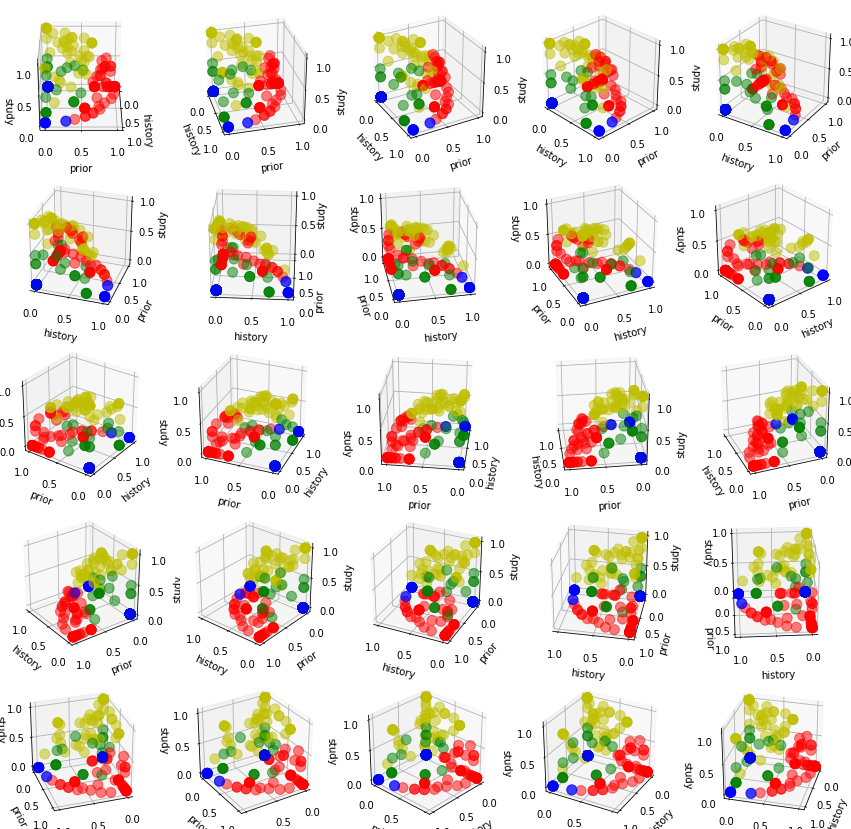

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def draw(ax, df):
    color_list = ['r', 'b', 'g', 'y']
    colors = [color_list[i] for i in df['category']]

    marker_list = ['o', 'x', 'v', 'X']
    markers = [marker_list[i] for i in df['category']]

    ax.scatter(df['history'], df['prior'], df['study'], c=colors, s=100, alpha=0.5)
    ax.set_xlabel('history')
    ax.set_ylabel('prior')
    ax.set_zlabel('study')

chart_count_vert = 5
chart_count_horiz = 5
number_of_graphs = chart_count_vert * chart_count_horiz

fig = plt.figure(figsize=(3 * chart_count_horiz, 3 * chart_count_vert))

for i in range(number_of_graphs):
    ax = fig.add_subplot(chart_count_horiz, chart_count_vert, i + 1, projection='3d', azim=(-360 / number_of_graphs) * i)
    draw(ax, df)

# Inclusion

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
inclusion = pd.read_csv('/content/gdrive/MyDrive/Harvard/Capstone/Prostate/spreadsheets/inclusion.csv')  

In [ ]:
inclusion = inclusion.fillna('')

In [ ]:
texts = np.array(inclusion['inclusion_criteria'])

In [ ]:
# https://stackoverflow.com/questions/24386489/adding-words-to-scikit-learns-countvectorizers-stop-list/24386751
from sklearn.feature_extraction import text 
# new stopwords are based on https://cs.stanford.edu/people/sonal/gupta14jamia_supl.pdf
new_stopwords = ["Eligibility Criteria", 'disease', 'diseases', 'disorder', 'symptom', 'symptoms', 'drug', 'drugs', 'problems', 'problem','prob', 'probs', 'med', 'meds',
'pill', 'pills', 'medicine', 'medicines', 'medication', 'medications', 'treatment', 'treatments', 'caps', 'capsules', 'capsule',
'tablet', 'tablets', 'tabs', 'doctor', 'dr', 'dr.', 'doc', 'physician', 'physicians', 'test', 'tests', 'testing', 'specialist', 'specialists',
'side-effect', 'side-effects', 'pharmaceutical', 'pharmaceuticals', 'pharma', 'diagnosis', 'diagnose', 'diagnosed', 'exam',
'challenge', 'device', 'condition', 'conditions', 'suffer', 'suffering' ,'suffered', 'feel', 'feeling', 'prescription', 'prescribe',
'prescribed', 'over-the-counter', 'otc' ]
my_stopwords = ['patient', 'exclusion', 'inclusion', 'criteria', 'disease', 'patients', 'prostate', 'prostatic', 'clinical', 'cancer', 'age', 'years', 'male', 'female', 'maximum', 'minimum', 'healthy', 'volunteers', 'study', 'gender']
stop_words = text.ENGLISH_STOP_WORDS.union(new_stopwords)
stop_words = text.ENGLISH_STOP_WORDS.union(my_stopwords)

In [ ]:
#https://stackoverflow.com/questions/47010044/how-to-remove-numeric-characters-present-in-countvectorizer
import re
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    return text

In [ ]:
count_vectorizer = CountVectorizer(stop_words=stop_words, preprocessor=preprocess_text)
X = count_vectorizer.fit_transform(texts)
pd.DataFrame(X.toarray(), columns=count_vectorizer.get_feature_names())

,aa,aarhus,abdomen,abdominal,abdominoperineal,ability,abira,abiraterone,ablation,ablative,able,abnormal,abnormalities,abpi,absence,absolute,abstain,abstinence,abstinent,abuse,ac,accept,acceptable,accepted,accepting,accepts,access,accessible,accident,accordance,according,accounting,accrual,accurately,acetate,achieve,achieved,achieving,achlorhydria,acid,...,white,wi,wild,wilhelmina,william,willing,willingness,window,wine,withdrawal,withdrawn,wks,woman,women,work,working,workup,world,wort,wounds,write,writing,written,xofigo,xuln,xx,year,yo,york,yrs,zoladex,zoster,zubrod,zytiga,µg,µl,µmol,μg,μl,μmol
0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
233,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
234,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
235,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.DataFrame(X.toarray(), columns=count_vectorizer.get_feature_names()).mean(axis = 0).sort_values(ascending = True)

μmol             0.004219
habitual         0.004219
rescue           0.004219
resectability    0.004219
guardianship     0.004219
                   ...   
months           0.704641
treatment        0.890295
therapy          1.067511
psa              1.156118
prior            1.194093
Length: 2968, dtype: float64

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words, preprocessor=preprocess_text, use_idf=False, norm='l1')
X = tfidf_vectorizer.fit_transform(texts)
pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names())

,aa,aarhus,abdomen,abdominal,abdominoperineal,ability,abira,abiraterone,ablation,ablative,able,abnormal,abnormalities,abpi,absence,absolute,abstain,abstinence,abstinent,abuse,ac,accept,acceptable,accepted,accepting,accepts,access,accessible,accident,accordance,according,accounting,accrual,accurately,acetate,achieve,achieved,achieving,achlorhydria,acid,...,white,wi,wild,wilhelmina,william,willing,willingness,window,wine,withdrawal,withdrawn,wks,woman,women,work,working,workup,world,wort,wounds,write,writing,written,xofigo,xuln,xx,year,yo,york,yrs,zoladex,zoster,zubrod,zytiga,µg,µl,µmol,μg,μl,μmol
0,0.0,0.0,0.0,0.0,0.0,0.013793,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006897,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.006897,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.006897,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.006897,0.0,0.000000,0.000,0.0,0.0,0.0,0.013793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000,0.0,0.0,0.0,0.017241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.033708,0.022472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.011236,0.0,0.0,0.0,0.0,0.0,0.000000,0.011236,0.0,0.0,0.0,0.0,0.022472,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.005,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.005,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005208,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000,0.005208,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
233,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
234,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.054795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.054795,0.0,0.006849,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0

In [ ]:
idf_vectorizer = TfidfVectorizer(stop_words=stop_words,  use_idf=True, norm='l1', preprocessor=preprocess_text)
X = idf_vectorizer.fit_transform(texts)
idf_df = pd.DataFrame(X.toarray(), columns=idf_vectorizer.get_feature_names())
idf_df

,aa,aarhus,abdomen,abdominal,abdominoperineal,ability,abira,abiraterone,ablation,ablative,able,abnormal,abnormalities,abpi,absence,absolute,abstain,abstinence,abstinent,abuse,ac,accept,acceptable,accepted,accepting,accepts,access,accessible,accident,accordance,according,accounting,accrual,accurately,acetate,achieve,achieved,achieving,achlorhydria,acid,...,white,wi,wild,wilhelmina,william,willing,willingness,window,wine,withdrawal,withdrawn,wks,woman,women,work,working,workup,world,wort,wounds,write,writing,written,xofigo,xuln,xx,year,yo,york,yrs,zoladex,zoster,zubrod,zytiga,µg,µl,µmol,μg,μl,μmol
0,0.0,0.0,0.0,0.0,0.0,0.012295,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006002,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.01092,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.007383,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.008553,0.0,0.000000,0.000000,0.0,0.0,0.0,0.008802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.012633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.047431,0.019303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.009799,0.0,0.0,0.0,0.0,0.0,0.00000,0.014701,0.0,0.0,0.0,0.0,0.022814,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00719,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.006327,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005044,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.005977,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
233,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
234,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.052946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.062579,0.0,0.010081,0.0,0.

In [ ]:
vectorizer = TfidfVectorizer(use_idf=True, stop_words=stop_words, preprocessor=preprocess_text)
X = vectorizer.fit_transform(texts)

In [ ]:
from sklearn.cluster import KMeans

number_of_clusters = 2
km = KMeans(n_clusters=number_of_clusters)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: prior psa therapy uln progression
Cluster 1: biopsy psa treatment consent men


In [ ]:
results = pd.DataFrame()
results['text'] = texts
results['category'] = km.labels_
results

,text,category
0,"gender: Male,minimum age: 18 Years,maximum age...",0
1,"gender: Male,minimum age: 18 Years,maximum age...",1
2,"gender: Male,minimum age: 18 Years,maximum age...",0
3,"gender: Male,minimum age: 18 Years,maximum age...",1
4,"gender: All,minimum age: 18 Years,maximum age:...",0
...,...,...
232,"gender: Male,minimum age: 18 Years,maximum age...",0
233,"gender: Male,minimum age: 18 Years,maximum age...",1
234,"gender: Male,minimum age: 20 Years,maximum age...",0
235,"gender: All,minimum age: 18 Years,maximum age:...",1


In [ ]:
vectorizer = TfidfVectorizer(use_idf=True, max_features=4, stop_words=stop_words, preprocessor=preprocess_text)
X = vectorizer.fit_transform(texts)

In [ ]:
vectorizer.get_feature_names()

['prior', 'psa', 'therapy', 'treatment']

In [ ]:
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
df

,prior,psa,therapy,treatment
0,0.458577,0.888655,0.000000,0.000000
1,0.000000,0.000000,0.000000,1.000000
2,0.000000,0.000000,1.000000,0.000000
3,0.708985,0.000000,0.705224,0.000000
4,0.954462,0.000000,0.284819,0.088775
...,...,...,...,...
232,0.119348,0.925114,0.356144,0.055503
233,0.000000,0.000000,0.000000,0.000000
234,0.481235,0.699422,0.478682,0.223799
235,0.000000,0.000000,1.000000,0.000000


In [ ]:
from sklearn.cluster import KMeans

number_of_clusters = 4
km = KMeans(n_clusters=number_of_clusters)
km.fit(X)
df['category'] = km.labels_

In [ ]:
df['text'] = texts
df

,prior,psa,therapy,treatment,category,text
0,0.458577,0.888655,0.000000,0.000000,2,"gender: Male,minimum age: 18 Years,maximum age..."
1,0.000000,0.000000,0.000000,1.000000,3,"gender: Male,minimum age: 18 Years,maximum age..."
2,0.000000,0.000000,1.000000,0.000000,0,"gender: Male,minimum age: 18 Years,maximum age..."
3,0.708985,0.000000,0.705224,0.000000,0,"gender: Male,minimum age: 18 Years,maximum age..."
4,0.954462,0.000000,0.284819,0.088775,0,"gender: All,minimum age: 18 Years,maximum age:..."
...,...,...,...,...,...,...
232,0.119348,0.925114,0.356144,0.055503,2,"gender: Male,minimum age: 18 Years,maximum age..."
233,0.000000,0.000000,0.000000,0.000000,1,"gender: Male,minimum age: 18 Years,maximum age..."
234,0.481235,0.699422,0.478682,0.223799,2,"gender: Male,minimum age: 20 Years,maximum age..."
235,0.000000,0.000000,1.000000,0.000000,0,"gender: All,minimum age: 18 Years,maximum age:..."


In [ ]:
idf_df.mean(axis = 0).sort_values(ascending = True)

diverticulitis    0.000014
share             0.000014
varicella         0.000014
insensitive       0.000014
crohn             0.000014
                    ...   
consent           0.006606
therapy           0.007311
biopsy            0.007715
psa               0.007842
treatment         0.008088
Length: 2968, dtype: float64

In [ ]:
idf_df.mean(axis = 0).sort_values(ascending = True)